# About Bellabeat

Bellabeat is a high-tech company that manufactures health-focused smart products. Having offices around the world and multiple product launches, Bellabeat is ready for their next chapter in growth. Urška Sršen, co founder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data will reveal new growth opportunities for the company

# Ask

*What are some trends in smart device usage?
*How could these trends apply to Bellabeat customers?
*How these trends help influence Bellabeat marketing strategy? 

# Business Task

Identify opportunists for growth and recommendations for Bellabeats marketing strategy based on trends in smart device usage. 

# Data Credibilty

The data used for this analysis is public data from FitBit Fitness Tracker Data. The data includes data from 30 FitBit users including minute-level output for physical activity heart rate and sleep monitoring as well as daily activity, steps and heart rate. 

# Loading Packages

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# Importing Datasets

In [2]:
activity <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

### data was checked in spreadsheets, just need to ensure data uploaded correctly

In [3]:
head(activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


# Fixing Formatting

In [4]:
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())

intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")

intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")

calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())

activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())

sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

# Exploring Dataset

In [5]:
n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

### This tells us there are 33 participants. Only 8 used the weight log which is not significant to make any recomendations on. 

In [6]:
# activity
activity %>%  
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>% 
  summary()

# minutes active
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>% 
  select(Calories) %>% 
  summary()

# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

## Discoveries

* Looking at average activity times, users are on average sedentary for 991 minutes(16 hours). Most users are Lightly Active
* On average, users sleep for 419 minutes (7 hours) one time a day.
* Average total steps in 7,638 and distance 5.49 miles. According to National Institute of Health, 8,000 steps per day have a 50% lower risk of dying and taking 12,000 had a 65% lower risk of dying compared to the average in adults which is 4,000 steps per day.

# Merge Data
Inner join activity and sleep datasets on columns 'Id' and 'date' which i
I created below. 

## Merging 

In [7]:
merged_data <- merge(sleep, activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<dttm>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,1,327,346,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,04/13/16,2016-04-13,2,384,407,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,04/15/16,2016-04-15,1,412,442,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,04/16/16,2016-04-16,2,340,367,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,04/17/16,2016-04-17,1,700,712,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,04/19/16,2016-04-19,1,304,320,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


# Visualization

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


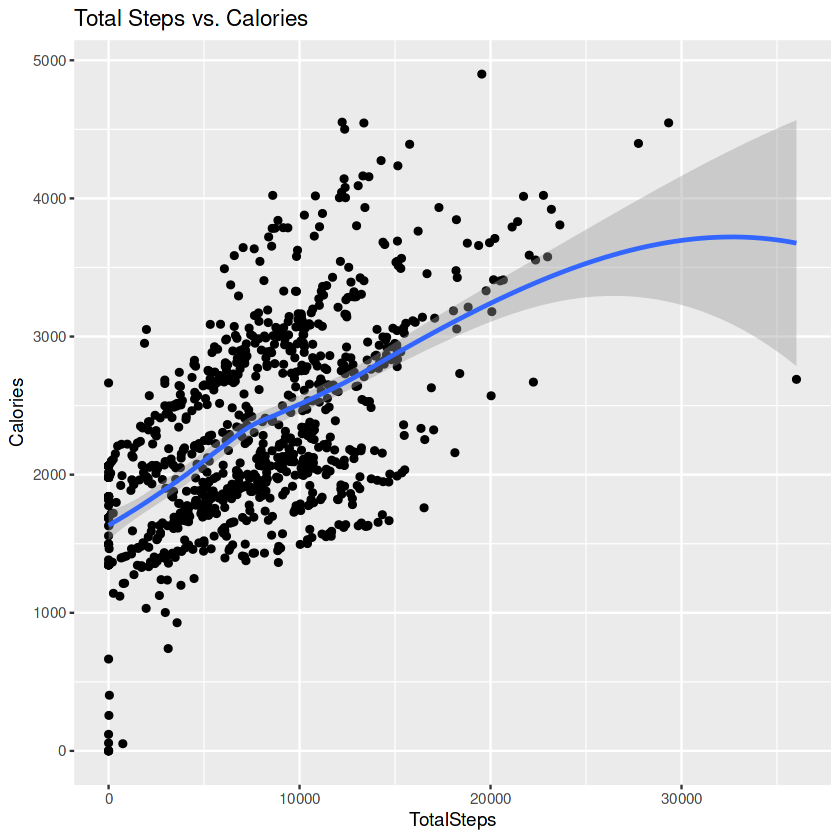

In [8]:
ggplot(data=activity, aes(x=TotalSteps, y=Calories)) +
  geom_point() + geom_smooth() + labs(title="Total Steps vs. Calories")

Graph shows correlation between total steps and calories. 

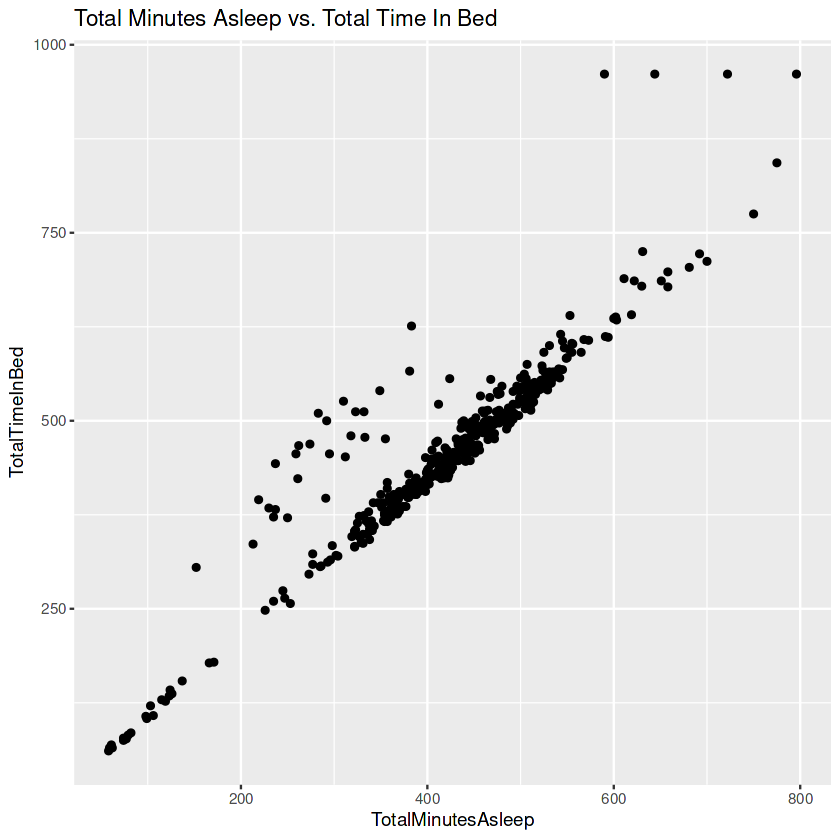

In [9]:
ggplot(data=sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) +
  geom_point() + labs(title="Total Minutes Asleep vs. Total Time In Bed")

Correlation between time in bed and minutes asleep is clear.

Warning message in geom_histogram(stat = "identity", fill = "black"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


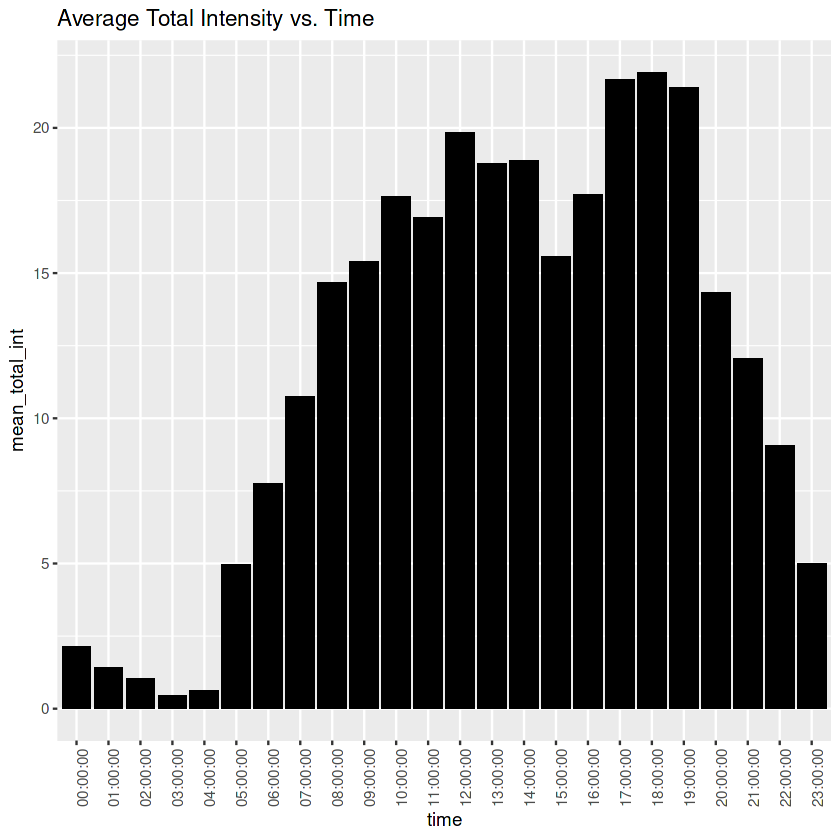

In [10]:
intensities_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>% 
  summarise(mean_total_int = mean(TotalIntensity))

ggplot(data=intensities_new, aes(x=time, y=mean_total_int)) + geom_histogram(stat = "identity", fill='black') +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title="Average Total Intensity vs. Time")

Warning: Ignoring unknown parameters: `binwidth`, `bins`, and `pad`

* People are most active between 5pm and 9pm.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


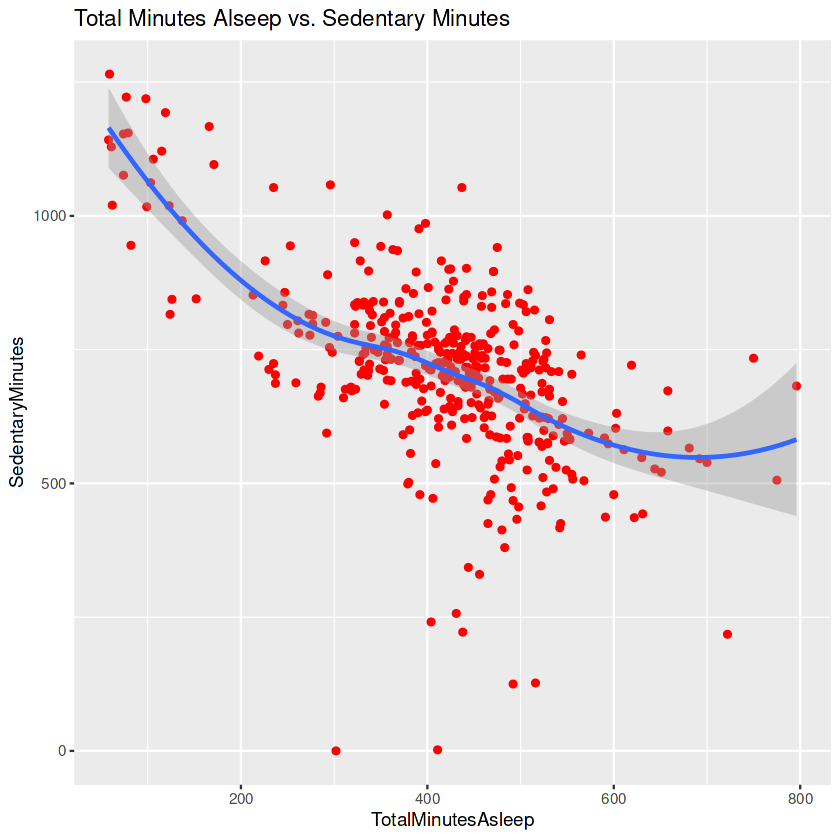

In [11]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +
  geom_point(color='red') + geom_smooth() +
  labs(title="Total Minutes Alseep vs. Sedentary Minutes")

* There is correlation between sedentary minutes and time asleep 
* On average, users are sedentary for 16 hours a day and sleep for 7 hours one time a day
* If BellaBeat users want to improve be more active and improve sleep, Bellabeat should encourage users to reduce sedentary time 

# Recomendations
After analysis of this dataset, I would like to preface with doing further analysis with a bigger data set on more users would help make a more accurate analysis. 

Upon analyzing the data available, I recommend making these improvements to the Bellabeat app 

1. Set notifications on the app when users have been sedentary for x amount of time. This will encourage users to add more activity to their days, increase step count which leads to more calories burned and better sleep. 
2. Add a page where users can share workouts, activity, daily steps etc. with other users and friends. This could encourage accountability between users and overall activity for each user. 

Including these two things Bellabeat should focus their marketing on the health benefits of daily actuvty and the correlation of activity and sleep. Daily reminders to get up and move around and sharing your activity among other users to encourage a more active lifestyle. 